In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import Point
from matplotlib import pyplot as plt


In [2]:
accident_data = pd.read_csv("US_Accidents_March23.csv")
columns = ['ID', 'County', 'State', 'Zipcode', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop']
accident_data = accident_data[columns]


In [3]:
county_data = gpd.read_file("zip:county_data.gpkg.zip")
county_data.to_crs("4269")

drop_states = ['02', '15', '60', '66', '69', '72', '78']
mask = county_data['STATEFP'].isin(drop_states)
state_data = county_data[~mask]
state_data = state_data.dissolve(by="STATEFP")


In [4]:
state_codes = {
    'WA': '53', 'DE': '10', 'DC': '11', 'WI': '55', 'WV': '54', 'HI': '15',
    'FL': '12', 'WY': '56', 'PR': '72', 'NJ': '34', 'NM': '35', 'TX': '48',
    'LA': '22', 'NC': '37', 'ND': '38', 'NE': '31', 'TN': '47', 'NY': '36',
    'PA': '42', 'AK': '02', 'NV': '32', 'NH': '33', 'VA': '51', 'CO': '08',
    'CA': '06', 'AL': '01', 'AR': '05', 'VT': '50', 'IL': '17', 'GA': '13',
    'IN': '18', 'IA': '19', 'MA': '25', 'AZ': '04', 'ID': '16', 'CT': '09',
    'ME': '23', 'MD': '24', 'OK': '40', 'OH': '39', 'UT': '49', 'MO': '29',
    'MN': '27', 'MI': '26', 'RI': '44', 'KS': '20', 'MT': '30', 'MS': '28',
    'SC': '45', 'KY': '21', 'OR': '41', 'SD': '46'
}

accident_data['STATEFP'] = accident_data['State'].map(state_codes)
counts_by_state = accident_data.groupby('STATEFP')['ID'].count().reset_index().rename(columns={"ID": "counts"})
geographic_data = gpd.GeoDataFrame(counts_by_state.merge(state_data, on='STATEFP'), geometry='geometry')
print(geographic_data.columns)


Index(['STATEFP', 'counts', 'geometry', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID',
       'GEOID', 'NAME', 'LSAD', 'ALAND', 'AWATER'],
      dtype='object')


### Accidents by States

In [5]:
counts_by_state = accident_data.groupby('STATEFP')['ID'].count().reset_index().rename(columns={"ID": "counts"})
geographic_data = gpd.GeoDataFrame(counts_by_state.merge(state_data, on='STATEFP'), geometry='geometry')

<AxesSubplot: >

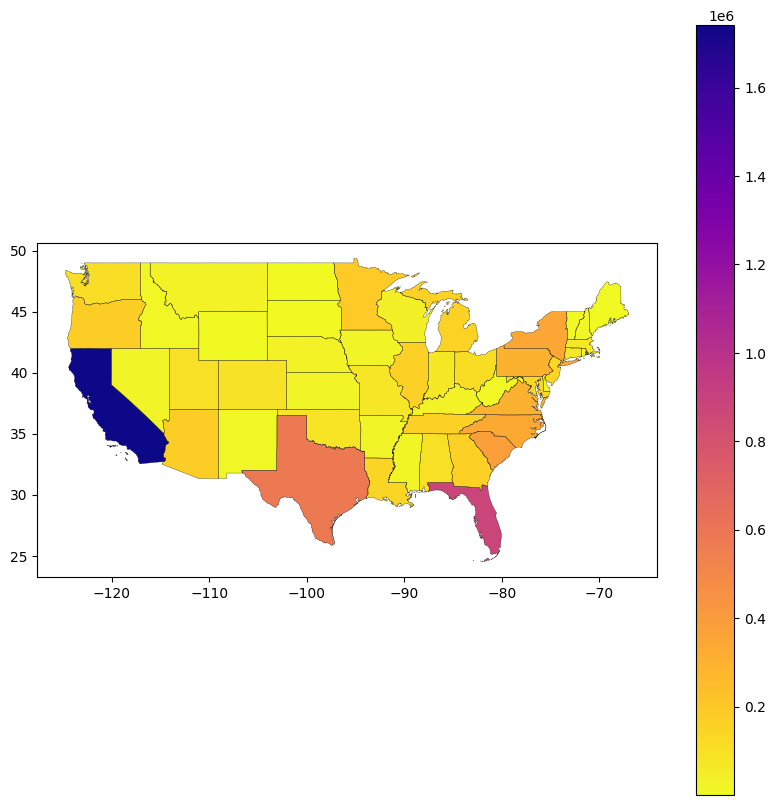

In [6]:
fig, ax = plt.subplots(1, figsize=(10,10))
state_data.to_crs("5071")
state_data.boundary.plot(linewidth=0.2, color='black', ax=ax)
geographic_data.plot(column='counts', legend=True, cmap='plasma_r', ax=ax)

### Infrastructure by States

<AxesSubplot: >

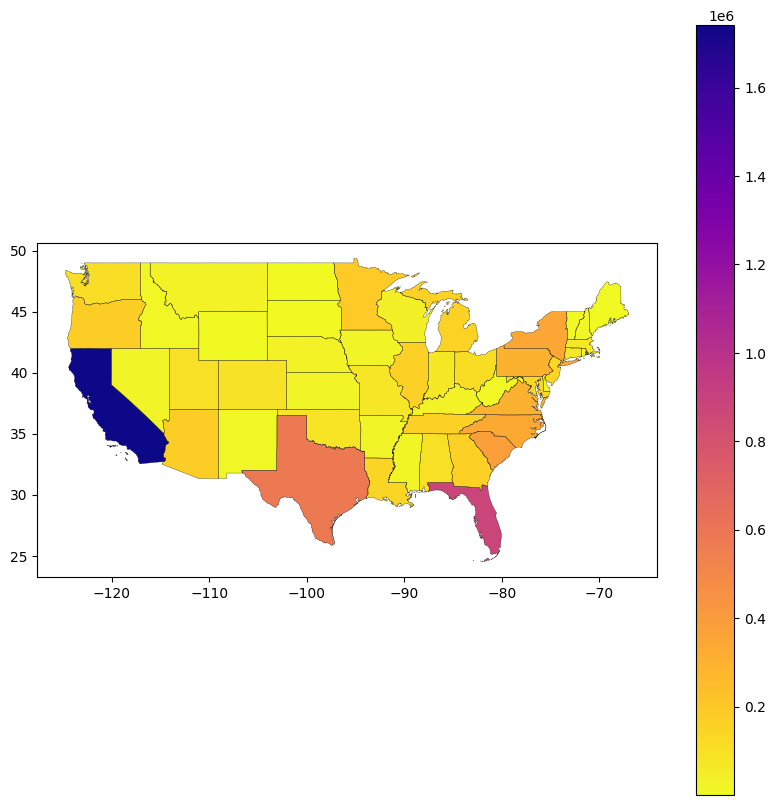

In [12]:
counts_by_state = accident_data.groupby('STATEFP')['Traffic_Signal'].count().reset_index().rename(columns={"Traffic_Signal": "counts"})
geographic_data = gpd.GeoDataFrame(counts_by_state.merge(state_data, on='STATEFP'), geometry='geometry')
fig, ax = plt.subplots(1, figsize=(10,10))
state_data.to_crs("5071")
state_data.boundary.plot(linewidth=0.2, color='black', ax=ax)
geographic_data.plot(column='counts', legend=True, cmap='plasma_r', ax=ax)